In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [20]:
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [21]:
data_dir = "C:/Users/Prathyushaa/Desktop/Project/data/data"

In [22]:
print(data_dir)

C:/Users/Prathyushaa/Desktop/Project/data/data


In [34]:
img_height, img_width = 224,224
batch_size = 8
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=11,
    label_mode='categorical',
    image_size=(img_height,img_width),
    batch_size=batch_size)

Found 759 files belonging to 7 classes.
Using 608 files for training.


In [35]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=11,
    label_mode="categorical",
    image_size=(img_height,img_width),
    batch_size= batch_size)

Found 759 files belonging to 7 classes.
Using 151 files for validation.


In [36]:
class_names= train_ds.class_names
print(class_names)

['A', 'B', 'C', 'D', 'E', 'F', 'G']


In [37]:
#training model

In [41]:
resnet_model= Sequential()

pretrained_model = tf.keras.applications.ResNet50(include_top=False,
                                                    input_shape=(224,224,3),
                                                 pooling='max',classes=7,
                                                 weights='imagenet')
for layer in pretrained_model.layers:
    layer.trainable=False
    
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(1024,activation='relu'))
resnet_model.add(Dense(7,activation='softmax'))

In [42]:
resnet_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 7175      
Total params: 25,693,063
Trainable params: 2,105,351
Non-trainable params: 23,587,712
_________________________________________________________________


In [43]:
resnet_model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
epochs=10
history = resnet_model.fit(
    train_ds,
    validation_data = val_ds,
    epochs=epochs)

Epoch 1/10
76/76 [==============================] - 64s 842ms/step - loss: 7.2580 - accuracy: 0.2911 - val_loss: 1.4685 - val_accuracy: 0.4967
Epoch 2/10
76/76 [==============================] - 65s 855ms/step - loss: 0.6999 - accuracy: 0.7664 - val_loss: 0.8168 - val_accuracy: 0.7616
Epoch 3/10
76/76 [==============================] - 67s 876ms/step - loss: 0.6424 - accuracy: 0.7862 - val_loss: 0.7889 - val_accuracy: 0.7020
Epoch 4/10
76/76 [==============================] - 69s 904ms/step - loss: 0.3268 - accuracy: 0.9030 - val_loss: 0.4956 - val_accuracy: 0.8344
Epoch 5/10
76/76 [==============================] - 66s 874ms/step - loss: 0.1745 - accuracy: 0.9457 - val_loss: 0.3204 - val_accuracy: 0.9205
Epoch 6/10
76/76 [==============================] - 65s 853ms/step - loss: 0.0661 - accuracy: 0.9868 - val_loss: 0.1967 - val_accuracy: 0.9404
Epoch 7/10
76/76 [==============================] - 67s 875ms/step - loss: 0.0228 - accuracy: 0.9984 - val_loss: 0.1723 - val_accuracy: 0.9470

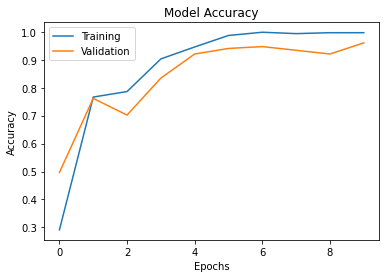

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(["Training","Validation"])
plt.show()

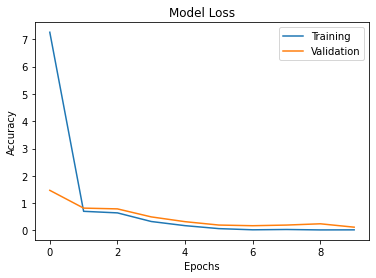

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(["Training", "Validation"])

In [56]:
resnet_model.save('C:/Users/Prathyushaa/Desktop/ResNet50.h5')

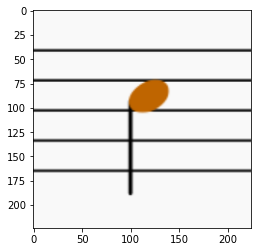

In [49]:
import cv2
IMG_SIZE=224
CATEGORIES = ["Dha-2","Ni-2","Sa","Re-2","Ga-2","Ma-1","Pa"]
def prepare(filepath):
    img = cv2.imread(filepath)
    new_img=cv2.resize(img,(IMG_SIZE,IMG_SIZE),3)
    plt.imshow(new_img)
    plt.show()
    return new_img.reshape(-1,IMG_SIZE,IMG_SIZE,3)

model= tf.keras.models.load_model("C:/Users/Prathyushaa/Desktop/ResNet50.h5")  
prediction=model.predict([prepare('C:/Users/Prathyushaa/Desktop/c4.jpeg')])

In [50]:
print(CATEGORIES[np.argmax(prediction)])

Sa
